In [78]:
import pandas as pd
import sklearn
from sklearn import linear_model
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns

In [79]:
df=pd.read_excel('bmi_data_phw3.xlsx',engine='openpyxl' )

In [80]:
df.describe()

Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000

In [81]:
df.keys()

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

In [82]:
df.dtypes

Sex                 object
Age                  int64
Height (Inches)    float64
Weight (Pounds)    float64
BMI                  int64
dtype: object

In [83]:
df.head()

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   30          63.7902         116.7431    3
1  Female   32          66.7917         125.1554    3
2  Female   27          71.1411         137.1114    3
3    Male   24          66.6432          86.9820    0
4  Female   19          69.4712         138.7444    3

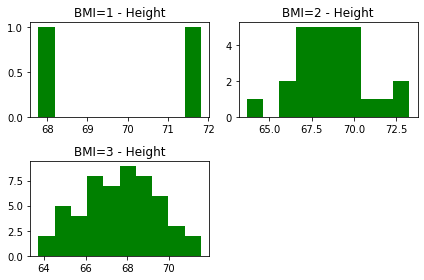

In [84]:
n_bins = 10
fig =plt.figure()
axs1=fig.add_subplot(2,2,1)
axs2=fig.add_subplot(2,2,2)
axs3=fig.add_subplot(2,2,3)

histData = df[df["BMI"] == 1].filter(["Height (Inches)"])
axs1.hist(histData.values, bins=n_bins, color="green")
axs1.set_title("BMI=1 - Height")

histData = df[df["BMI"] == 2].filter(["Height (Inches)"])
axs2.hist(histData.values, bins=n_bins, color="green")
axs2.set_title("BMI=2 - Height")

histData = df[df["BMI"] == 3].filter(["Height (Inches)"])
axs3.hist(histData.values, bins=n_bins, color="green")
axs3.set_title("BMI=3 - Height")

fig.tight_layout()
plt.show()

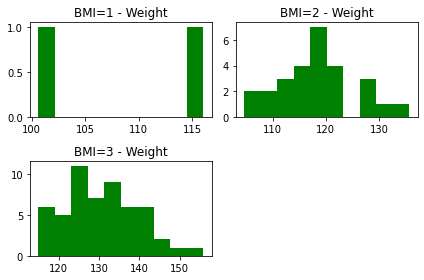

In [85]:
n_bins = 10
fig =plt.figure()
axs1=fig.add_subplot(2,2,1)
axs2=fig.add_subplot(2,2,2)
axs3=fig.add_subplot(2,2,3)

histData = df[df["BMI"] == 1].filter(["Weight (Pounds)"])
axs1.hist(histData.values, bins=n_bins, color="green")
axs1.set_title("BMI=1 - Weight")


histData = df[df["BMI"] == 2].filter(["Weight (Pounds)"])
axs2.hist(histData.values, bins=n_bins, color="green")
axs2.set_title("BMI=2 - Weight")


histData = df[df["BMI"] == 3].filter(["Weight (Pounds)"])
axs3.hist(histData.values, bins=n_bins, color="green")
axs3.set_title("BMI=3 - Weight")


fig.tight_layout()
plt.show()

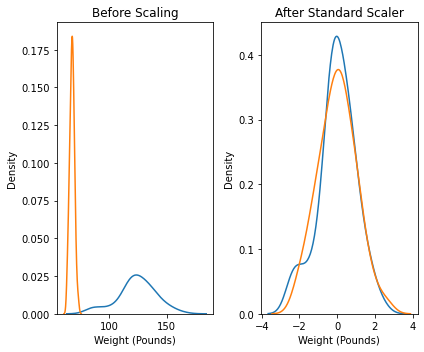

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)

fig.tight_layout()
plt.show()


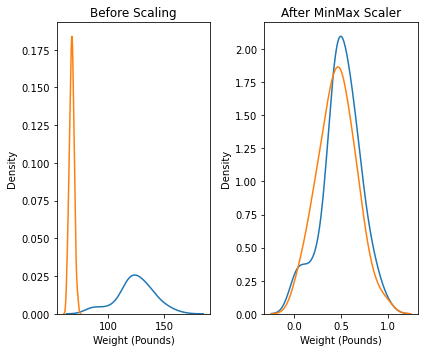

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)

fig.tight_layout()
plt.show()


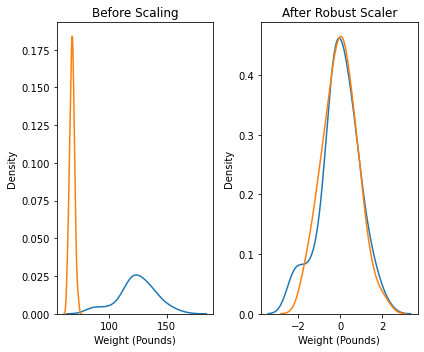

In [88]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)

fig.tight_layout()
plt.show()

In [89]:
reg=linear_model.LinearRegression()
reg.fit(df[['Height (Inches)']],df['Weight (Pounds)'])
m=reg.coef_
b=reg.intercept_

In [90]:
print(m)
print(b)

[1.58948562]
16.409041778747437


In [91]:
W_pred=[]
for i in range(100):
    x=df['Height (Inches)'][i]
    w_pred=(m*x)+b # Predict Weight with using original Height values
    W_pred.append(w_pred[0])
    

In [92]:
W_pred

[117.80264756249028,
 122.57348865971062,
 129.48679742807644,
 122.33745004470569,
 126.83251538634791,
 125.27275314456804,
 119.83575862277831,
 126.34056958605149,
 122.22094074854505,
 122.40246000668348,
 128.79902699903522,
 128.4280410546437,
 130.14532132165579,
 124.55064982607155,
 126.84888708826408,
 124.22480527337119,
 124.25738972864121,
 125.0707295218938,
 122.81079886321386,
 119.17596314070063,
 125.33887574648186,
 126.4494493512221,
 125.31853033050837,
 127.20811083904594,
 125.00603745704062,
 125.24318871198156,
 118.08748338611909,
 117.6994899455622,
 121.40299144698596,
 127.82896392336188,
 122.30550138368483,
 125.20551790271814,
 123.3488397465752,
 130.56876029160398,
 121.06045729524483,
 119.75485380457124,
 122.91157225170754,
 126.13282381513473,
 124.86727536215895,
 122.43091179933391,
 121.49899637861085,
 127.15263779080574,
 132.03903449281296,
 122.49321963575272,
 117.64052002895156,
 124.39392654365078,
 122.00429385813986,
 120.0714793406586

In [93]:
m_height=df['Height (Inches)']/39.37
kg_weight=[]
for j in range(100):
    kg_w=W_pred[j]*0.45359237
    kg_weight.append(kg_w)

for i in range(100):
    n_bmi=(kg_weight[i])/((m_height[i])*(m_height[i])) # calculate new value of BMI with using expected weight value

    if n_bmi<15:
        df['BMI_Pred']=0
    elif 15<=n_bmi<19:
        df['BMI_Pred']=1
    elif 19<=n_bmi<25:
        df['BMI_Pred']=2
    elif 25<=n_bmi<30:
        df['BMI_Pred']=3
    else:
        df['BMI_Pred']=4
        

In [94]:
list_e=df['Weight (Pounds)']-W_pred[i]
print(list_e)

0     -2.212878
1      6.199422
2     18.155422
3    -31.973978
4     19.788422
        ...    
95    11.141522
96     0.570122
97   -34.596178
98     5.450222
99    29.544722
Name: Weight (Pounds), Length: 100, dtype: float64


In [95]:
ss.zscore(list_e)

array([-0.44165321,  0.063254  ,  0.78085448, -2.22791782,  0.87886732,
       -1.57558921, -0.54792482, -0.1870899 , -0.44107701, -1.07286073,
       -0.1059427 , -1.09964771,  1.91103322,  0.48895266,  0.27473487,
       -0.62075923, -0.00638134,  0.9557891 ,  0.18497479,  0.05057775,
       -0.58718398, -1.35938475,  1.08554058,  0.21687548, -0.24116202,
        1.49152864, -2.35507043,  0.60034999,  1.16576947,  0.89057125,
       -0.91509787,  0.59466608,  0.52957427, -0.48235285, -0.86727384,
        1.64048055, -1.81973303, -0.32425386, -0.05802865,  0.62105693,
       -0.36857272,  1.28327085,  0.69889101, -0.15461301, -1.1670383 ,
       -0.72339962, -0.68343223, -0.51469768,  0.43344005,  0.55341426,
        0.22655072, -0.36850069, -2.38530256,  1.02040676, -0.12630153,
       -1.40894336, -0.20732268, -0.41280154,  1.71149035,  0.0611833 ,
        0.78170076,  0.3634446 ,  0.55179972,  0.86572892,  0.21682746,
        0.13728881,  0.2315744 ,  1.59596964,  1.02447012, -2.46

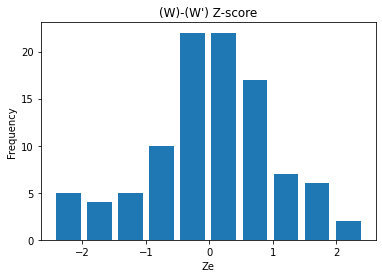

In [96]:
n_bins = 10
fig =plt.figure()
axs=fig.add_subplot()
#Plot Z score of w-w' (gap between predicted value and original value)
axs.hist(ss.zscore(list_e), bins=n_bins,rwidth=0.8)
axs.set_title("(W)-(W') Z-score")
plt.ylabel("Frequency")
plt.xlabel("Ze")
plt.show()

In [97]:
df[['BMI','BMI_Pred']] # Compare predicted BMI with real BMI value 

BMI  BMI_Pred
0     3         2
1     3         2
2     3         2
3     0         2
4     3         2
..  ...       ...
95    3         2
96    2         2
97    0         2
98    3         2
99    4         2

[100 rows x 2 columns]

In [98]:
#Decide a value α (≥0); for records with ze<-α, set BMI = 0; for those with ze>α, set BMI = 4
α=1

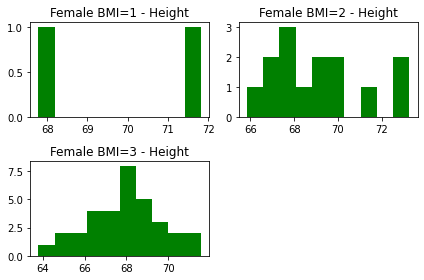

In [99]:
D_f=df[df["Sex"] == 'Female']  #Dataframe of Female
#Plot the data based on BMI
n_bins = 10
fig =plt.figure()
axs1=fig.add_subplot(2,2,1)
axs2=fig.add_subplot(2,2,2)
axs3=fig.add_subplot(2,2,3)

histData = D_f[D_f["BMI"] == 1].filter(["Height (Inches)"])
axs1.hist(histData.values, bins=n_bins, color="green")
axs1.set_title("Female BMI=1 - Height")

histData = D_f[D_f["BMI"] == 2].filter(["Height (Inches)"])
axs2.hist(histData.values, bins=n_bins, color="green")
axs2.set_title("Female BMI=2 - Height")

histData = D_f[D_f["BMI"] == 3].filter(["Height (Inches)"])
axs3.hist(histData.values, bins=n_bins, color="green")
axs3.set_title("Female BMI=3 - Height")

fig.tight_layout()
plt.show()

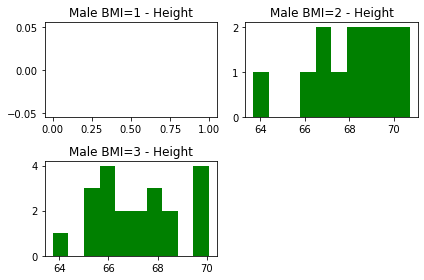

In [100]:
D_m=df[df["Sex"] == 'Male'] # Dataframe of Male
#Plot the data based on BMI
n_bins = 10
fig =plt.figure()
axs1=fig.add_subplot(2,2,1)
axs2=fig.add_subplot(2,2,2)
axs3=fig.add_subplot(2,2,3)

histData = D_m[D_m["BMI"] == 1].filter(["Height (Inches)"])
axs1.hist(histData.values, bins=n_bins, color="green")
axs1.set_title("Male BMI=1 - Height")

histData = D_m[D_m["BMI"] == 2].filter(["Height (Inches)"])
axs2.hist(histData.values, bins=n_bins, color="green")
axs2.set_title("Male BMI=2 - Height")

histData = D_m[D_m["BMI"] == 3].filter(["Height (Inches)"])
axs3.hist(histData.values, bins=n_bins, color="green")
axs3.set_title("Male BMI=3 - Height")

fig.tight_layout()
plt.show()

In [101]:
f_reg=linear_model.LinearRegression()
f_reg.fit(D_f[['Height (Inches)']],D_f['Weight (Pounds)'])
m=f_reg.coef_
b=f_reg.intercept_
f_W_pred=[]
r=D_f.index.tolist()
for i in (r):
    x=D_f['Height (Inches)'][i]
    f_w_pred=(m*x)+b
    f_W_pred.append(f_w_pred[0])
 

In [102]:
f_W_pred

[122.63474835465564,
 125.01233572361814,
 128.45763923938208,
 127.13485624840075,
 126.35753608009728,
 123.64796574717269,
 124.83664061169547,
 124.92710220674311,
 127.92999941047455,
 128.78581996467315,
 125.85152148363107,
 126.2568559686213,
 125.13060118894751,
 123.31915131543644,
 126.39048881524596,
 126.38034951212329,
 126.34280240524711,
 124.42900894084153,
 126.32402885180903,
 128.9968442109139,
 124.25830426717455,
 126.78615927694739,
 126.1554629373945,
 129.72956728813872,
 125.91956571318093,
 128.13207255317732,
 128.65511801035737,
 126.75970203286164,
 125.98816443587032,
 127.49812846809297,
 125.79567610315071,
 125.65309215298804,
 124.984848706559,
 125.94388419801423,
 126.0350587128127,
 123.26100874909233,
 127.49321724314291,
 125.40856067845905,
 125.40404552003724,
 125.84360015306649,
 130.1429815303048,
 126.68128086027217,
 127.76452281498021,
 125.70299653554497,
 126.582660294743,
 127.56411315169602,
 127.41946965558657,
 123.90826066952522,
 

In [103]:
m_height=[]
kg_weight=[]
for k in (r):
    m_h=D_f['Height (Inches)'][k]/39.37
    m_height.append(m_h)
for j in range(55):
    kg_w=(f_W_pred[j])*0.45359237
    kg_weight.append(kg_w)

for i in range (55):
    f_n_bmi=(kg_weight[i])/((m_height[i])*(m_height[i])) # calculate new value of Female's BMI with using expected weight value

    if f_n_bmi<15:
        D_f['BMI_Pred_F']=0
    elif 15<=f_n_bmi<19:
        D_f['BMI_Pred_F']=1
    elif 19<=f_n_bmi<25:
        D_f['BMI_Pred_F']=2
    elif 25<=f_n_bmi<30:
        D_f['BMI_Pred_F']=3
    else:
        D_f['BMI_Pred_F']=4
    

<ipython-input-103-f2414614964d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_f['BMI_Pred_F']=2
<ipython-input-103-f2414614964d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_f['BMI_Pred_F']=1


In [104]:
f_list_e=D_f["Weight (Pounds)"]-f_W_pred[i]
print(f_list_e) #list e for female datas

0     -6.46642
1      1.94588
2     13.90188
4     15.53488
5    -25.35902
6     -8.23702
8     -6.45682
9    -16.98302
11   -17.42932
12    32.73188
16     0.78568
17    16.81648
18     3.97388
19     1.73468
20    -8.89112
22    18.97828
25    25.74248
28    20.31498
31    10.79978
33    -7.14452
34   -13.55772
37    -4.51042
38    -0.07482
42    12.53628
45   -11.16062
49    10.11248
50     4.66658
51    -5.24762
53    17.89308
54    -1.21232
55   -22.58252
56    -2.56222
60    13.91598
63    15.31598
66     4.75028
67    27.48258
68    17.96078
72     8.02648
74     0.82568
75     2.64388
77     7.05408
78    12.97888
79     4.19768
80   -31.94882
81    20.66418
82    11.79248
85    11.58098
88    -2.63492
89    -7.54732
90   -30.45992
93    -4.71502
95     6.88798
96    -3.68342
98     1.19668
99    25.29118
Name: Weight (Pounds), dtype: float64


In [105]:
ss.zscore(f_list_e)

array([-0.661189  , -0.07041464,  0.76922474,  0.88390616, -1.98796809,
       -0.78553372, -0.66051482, -1.39974298, -1.43108549,  2.09160759,
       -0.15189252,  0.97390966,  0.07200663, -0.08524667, -0.83146949,
        1.12572735,  1.60075986,  1.21960038,  0.55137217, -0.70881023,
       -1.1591929 , -0.52382411, -0.21232324,  0.67332213, -0.99085069,
        0.50310484,  0.12065318, -0.57559579,  1.04951653, -0.29220696,
       -1.79298158, -0.387007  ,  0.77021494,  0.86853337,  0.12653122,
        1.72296264,  1.05427093,  0.35661039, -0.14908342, -0.02139588,
        0.28832121,  0.7044048 ,  0.08772353, -2.45075293,  1.24412381,
        0.62108696,  0.60623385, -0.39211253, -0.73709785, -2.34619128,
       -0.53819265,  0.27665644, -0.46574601, -0.12302904,  1.56906621])

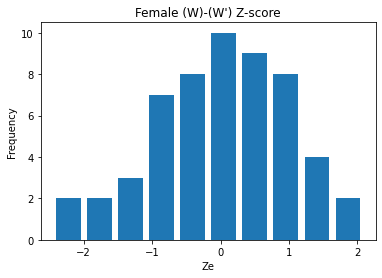

In [106]:
n_bins = 10
fig =plt.figure()
axs=fig.add_subplot()
#Plot Z score of w-w' (gap between predicted value and original value)
axs.hist(ss.zscore(f_list_e), bins=n_bins,rwidth=0.8)
axs.set_title("Female (W)-(W') Z-score")
plt.ylabel("Frequency")
plt.xlabel("Ze")
plt.show()

In [108]:
D_f[['BMI','BMI_Pred']].head() # Compare predicted Female's BMI with real BMI value 

BMI  BMI_Pred
0    3         2
1    3         2
2    3         2
4    3         2
5    0         2

In [109]:
m_reg=linear_model.LinearRegression()
m_reg.fit(D_m[['Height (Inches)']],D_m['Weight (Pounds)'])
m=m_reg.coef_
b=m_reg.intercept_
m_W_pred=[]
r=D_m.index.tolist()
for i in (r):
    x=D_m['Height (Inches)'][i]
    m_w_pred=(m*x)+b
    m_W_pred.append(m_w_pred[0])


In [110]:
m_W_pred

[120.44010110461276,
 126.03177193897638,
 129.46581493262744,
 123.53156128716903,
 126.74180423313142,
 123.07641238065939,
 126.18385828090764,
 127.24357814957621,
 124.16765963699835,
 114.50362722058601,
 113.96166698605428,
 128.11080333436973,
 120.39547430938914,
 121.85283890564735,
 116.83265747877438,
 121.2420512754971,
 120.57065113243117,
 119.26892525981357,
 127.16609182354115,
 120.65768448431008,
 113.8792961351689,
 119.97473910068878,
 117.27492900158767,
 126.94295784742302,
 118.87660910478793,
 120.8841488182807,
 117.76005112876989,
 119.59574437707319,
 118.50782747858672,
 121.23050603494174,
 124.8148591796694,
 117.10929920438953,
 112.62996789276413,
 118.41613162571427,
 122.51269380815792,
 124.621476400367,
 122.48782713619251,
 117.30534626997392,
 125.76512128691878,
 122.79710636876224,
 128.26977241586286,
 127.6592068095694,
 124.31907990735913,
 117.50205940712884,
 118.87660910478793]

In [114]:
m_height=[]
kg_weight=[]
for k in (r):
    m_h=D_m['Height (Inches)'][k]/39.37
    m_height.append(m_h)
for j in range(45):
    kg_w=(m_W_pred[j])*0.45359237
    kg_weight.append(kg_w)

for i in range (45):
    m_n_bmi=(kg_weight[i])/((m_height[i])*(m_height[i])) # calculate new value of Male's BMI with using expected weight value

    if m_n_bmi<15:
        D_m['BMI_Pred_F']=0
    elif 15<=m_n_bmi<19:
        D_m['BMI_Pred_F']=1
    elif 19<=m_n_bmi<25:
        D_m['BMI_Pred_F']=2
    elif 25<=m_n_bmi<30:
        D_m['BMI_Pred_F']=3
    else:
        D_m['BMI_Pred_F']=4
    

<ipython-input-114-1622d48da0d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_m['BMI_Pred_F']=2
<ipython-input-114-1622d48da0d4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_m['BMI_Pred_F']=1


In [115]:
m_list_e=D_m["Weight (Pounds)"]-m_W_pred[i]
print(m_list_e) #list e for male datas

3    -31.894609
7      2.107791
10     3.459791
13    13.371391
14     9.802291
15    -5.117609
21   -17.423909
23     8.838291
24     1.206891
26   -34.013109
27    15.227391
29    20.062791
30   -10.021609
32    14.048191
35    32.557091
36   -25.093809
39    15.572391
40    -0.915909
41    26.605591
43     2.648891
44   -14.219209
46    -6.161809
47    -3.350509
48    12.446491
52   -34.516809
57    -1.652809
58    33.740191
59     6.244291
61    11.280291
62    14.418491
64     8.837491
65     7.512291
69   -35.791309
70     2.623091
71     6.203391
73     5.287491
76    45.709891
83    -1.859909
84    -1.880109
86    23.015991
87     3.119091
91    -3.201409
92    -1.357609
94    39.052591
97   -34.516809
Name: Weight (Pounds), dtype: float64


In [117]:
ss.zscore(m_list_e)

array([-1.8300992 , -0.03191886,  0.03958021,  0.56374451,  0.3749965 ,
       -0.41402636, -1.0648318 ,  0.3240164 , -0.07956198, -1.94213379,
        0.66189708,  0.917612  , -0.67336913,  0.59953635,  1.57835962,
       -1.47044621,  0.68014203, -0.19182398,  1.26362094, -0.00330336,
       -0.89535469, -0.46924776, -0.32057518,  0.51483217, -1.96877143,
       -0.23079414,  1.64092659,  0.1868355 ,  0.45315894,  0.61911927,
        0.32397409,  0.25389231, -2.03617199, -0.00466777,  0.18467254,
        0.13623616,  2.2739313 , -0.2417464 , -0.24281466,  1.07378881,
        0.02156266, -0.31269019, -0.21518281,  1.92186715, -1.96877143])

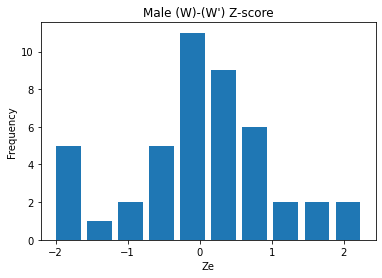

In [118]:
n_bins = 10
fig =plt.figure()
axs=fig.add_subplot()
#Plot Z score of w-w' (gap between predicted value and original value)
axs.hist(ss.zscore(m_list_e), bins=n_bins,rwidth=0.8)
axs.set_title("Male (W)-(W') Z-score")
plt.ylabel("Frequency")
plt.xlabel("Ze")
plt.show()

In [119]:
D_m[['BMI','BMI_Pred']].head() # Compare predicted Male's BMI with real BMI value 

BMI  BMI_Pred
3     0         2
7     2         2
10    2         2
13    3         2
14    3         2